In [1]:
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


# Correlations over time

In [2]:
import os
import sys

import pandas as pd
import seaborn as sns

# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.pardir, 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport features.build_features
%aimport visualization.visualize
from visualization.visualize import biplot, plot_explained_variance, triplot

In [3]:
YEARS = [1976, 1988, 1992, 1996, 2000, 2004, 2008, 2012]

In [4]:
DATA_FRAMES = [pd.read_csv("../data/processed/{year}.csv".format(year=year), index_col=0) for year in YEARS]

In [5]:
def plot_correlation_with_party_over_time(var_name):
    years_available = YEARS[:]  # Copy
    corrs = []
    for df, year in zip(DATA_FRAMES, years_available[:]):
        try: 
            corrs.append(df.PartyID.corr(df[var_name], method='spearman'))
        except KeyError:
            years_available.remove(year)
    plt.plot(years_available, corrs, label=var_name)
    plt.title(var_name)
    plt.ylabel("Correlation with Party ID")
    plt.xlabel("Year")
    plt.xlim([1975, 2017])
    plt.ylim(0, 0.6)

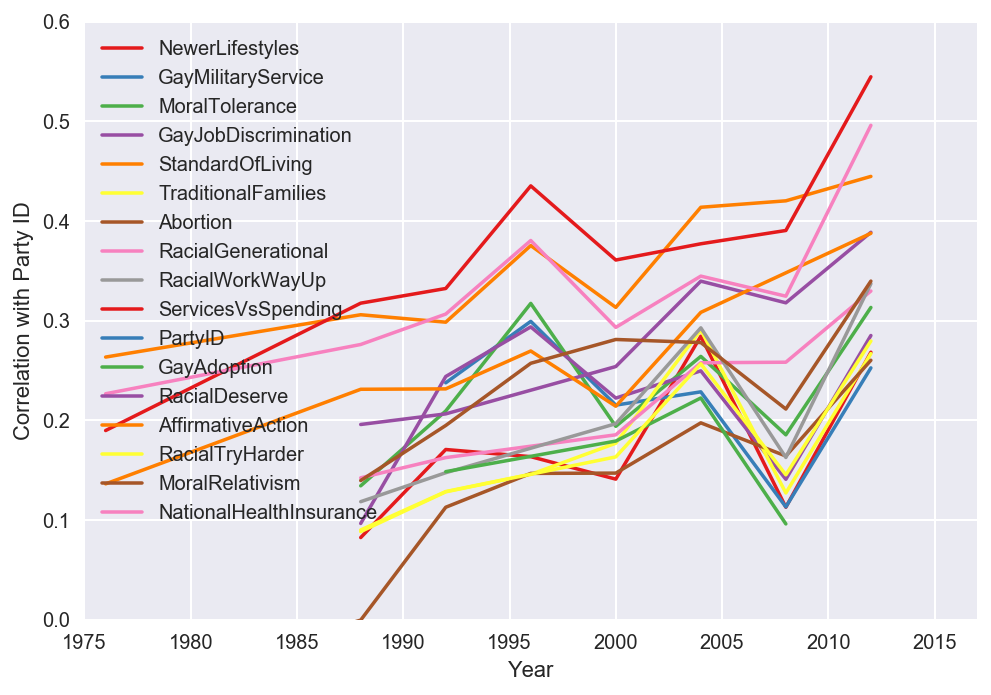

In [6]:
sns.set_palette("Set1", n_colors=20)
from functools import reduce
all_variables_list = [set(df.columns) for df in DATA_FRAMES[1:]]
VARIABLES_IN_ANY_YEAR = list(reduce(set.union, all_variables_list))
for var in VARIABLES_IN_ANY_YEAR:
    plot_correlation_with_party_over_time(var)
plt.legend()
plt.title("");

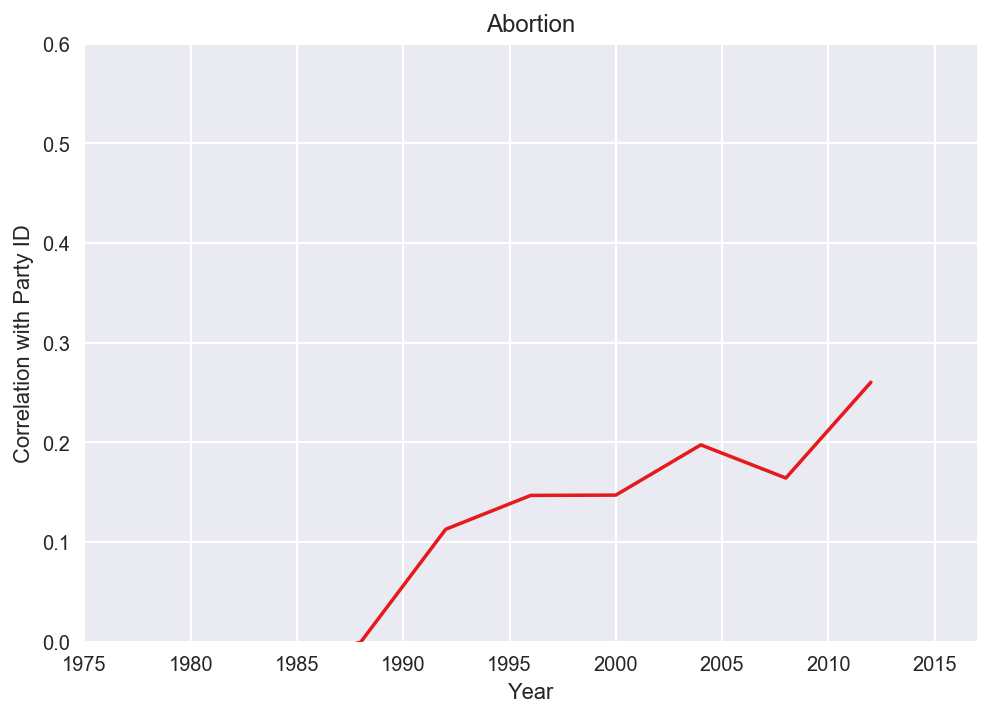

In [7]:
plot_correlation_with_party_over_time("Abortion")

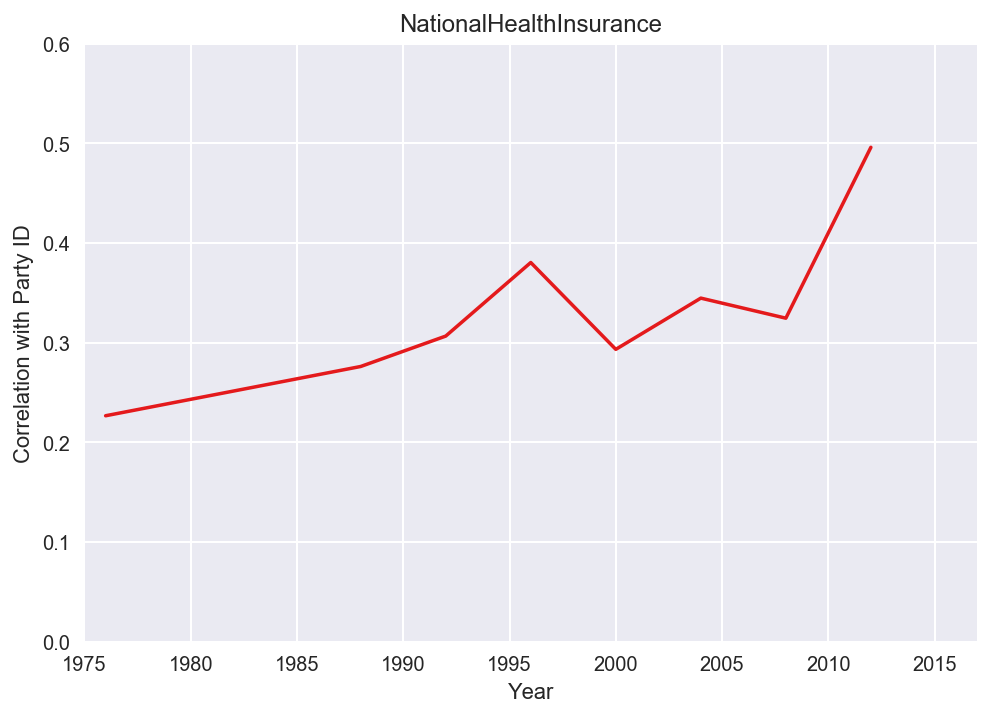

In [8]:
plot_correlation_with_party_over_time("NationalHealthInsurance")

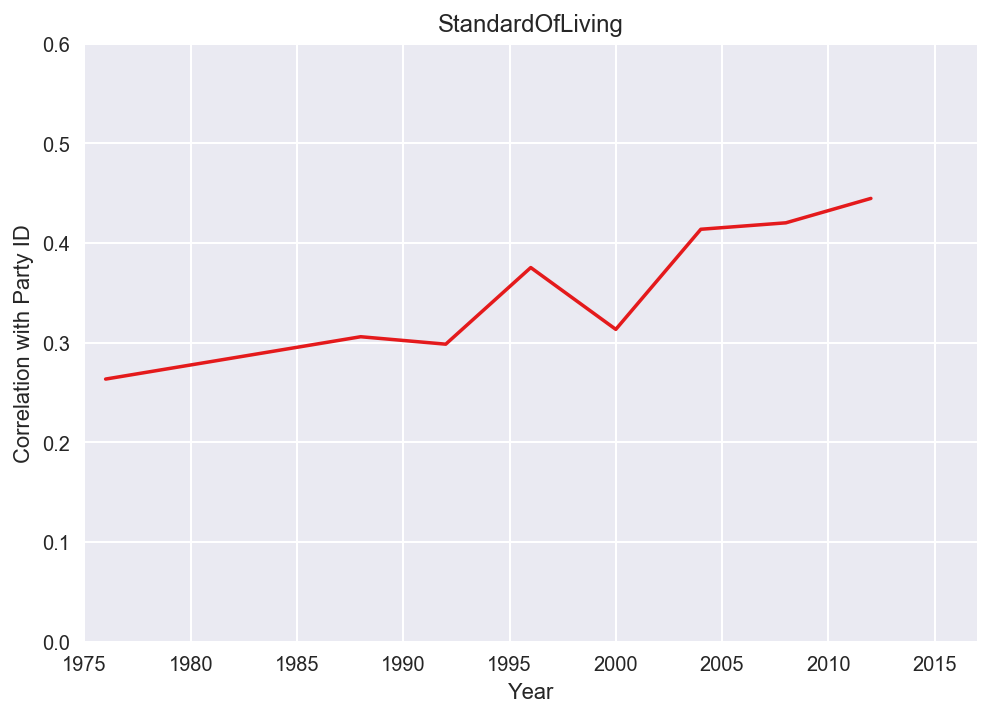

In [9]:
plot_correlation_with_party_over_time("StandardOfLiving")

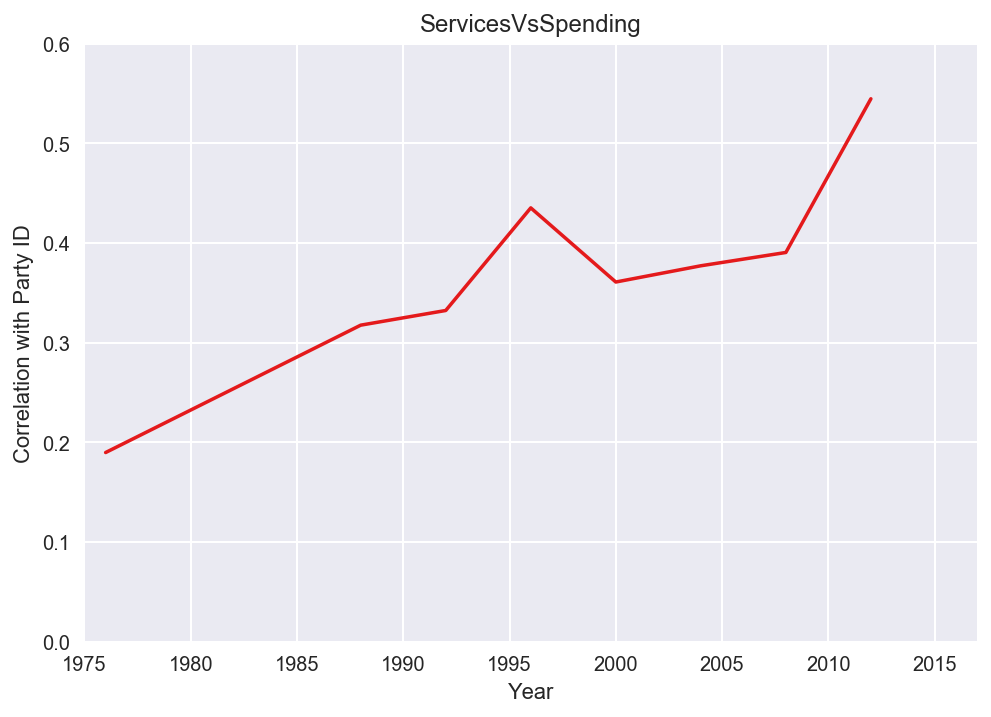

In [10]:
plot_correlation_with_party_over_time("ServicesVsSpending")

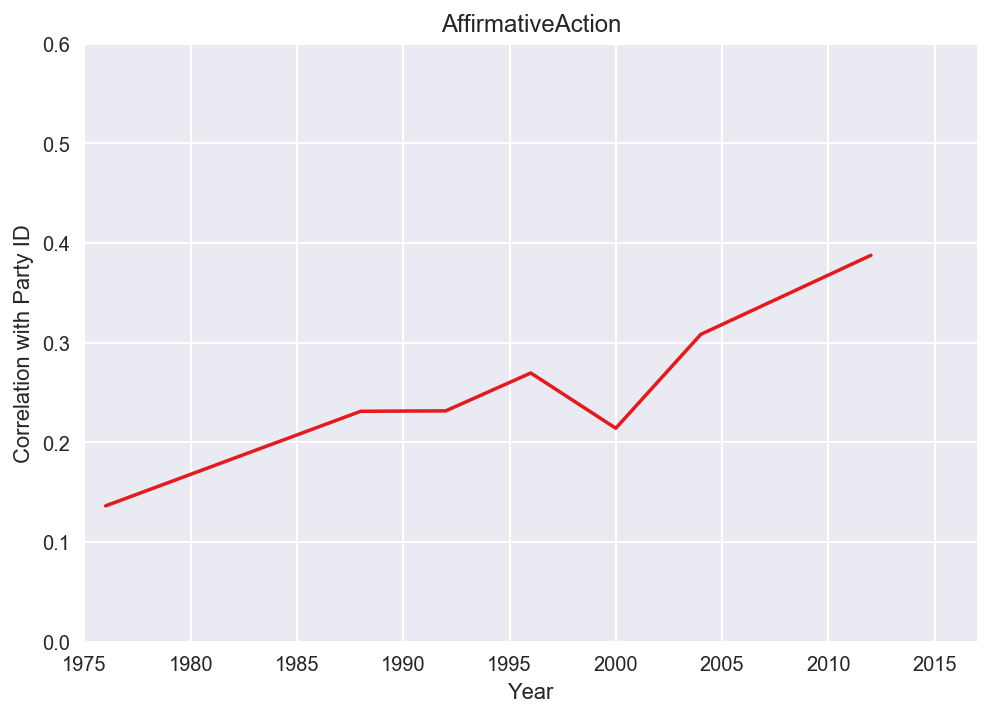

In [11]:
plot_correlation_with_party_over_time("AffirmativeAction")

## And then Trump happened.

In [12]:
YEARS.append(2016)

In [13]:
DATA_FRAMES = [pd.read_csv("../data/processed/{year}.csv".format(year=year), index_col=0) for year in YEARS]

In [14]:
from functools import reduce
all_variables_list = [set(df.columns) for df in DATA_FRAMES[1:]]
VARIABLES_CONSISTENT_ACROSS_ALL_YEARS = list(reduce(set.intersection, all_variables_list))

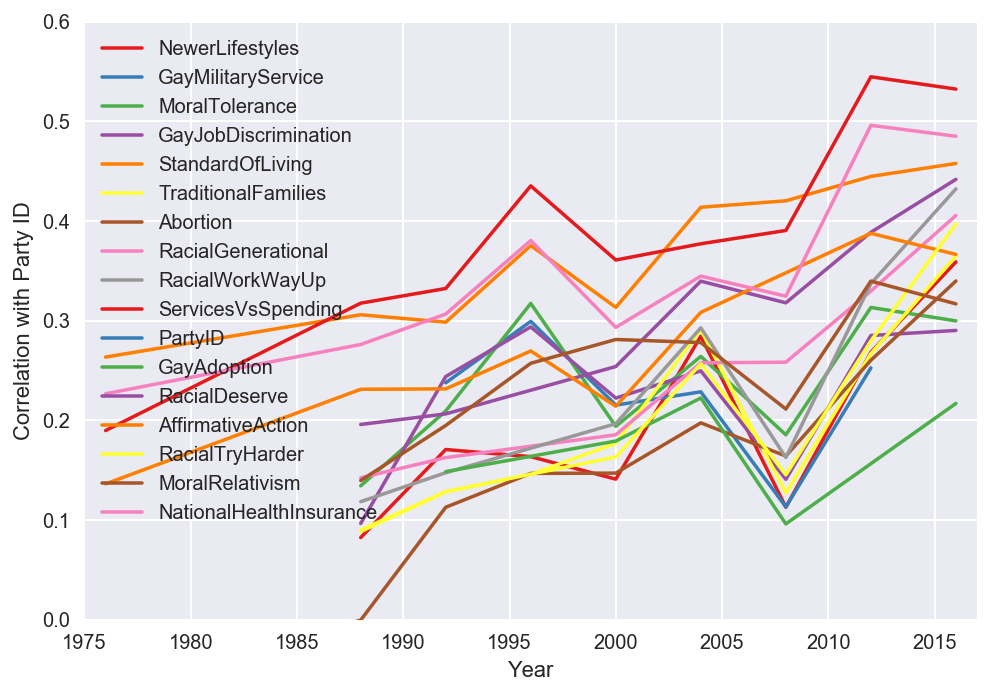

In [15]:
sns.set_palette("Set1", n_colors=20)
from functools import reduce
all_variables_list = [set(df.columns) for df in DATA_FRAMES[1:]]
VARIABLES_IN_ANY_YEAR = list(reduce(set.union, all_variables_list))
for var in VARIABLES_IN_ANY_YEAR:
    plot_correlation_with_party_over_time(var)
plt.legend()
plt.title("");

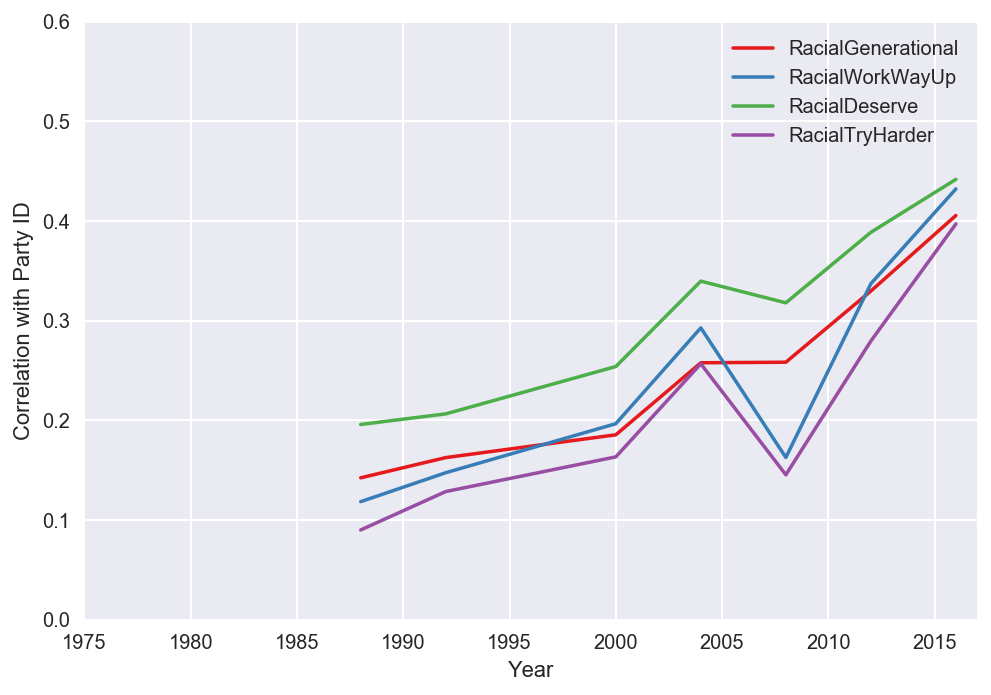

In [16]:
sns.set_palette("Set1", n_colors=20)
from functools import reduce
all_variables_list = [set(df.columns) for df in DATA_FRAMES[1:]]
VARIABLES_IN_ANY_YEAR = list(reduce(set.union, all_variables_list))
for var in VARIABLES_IN_ANY_YEAR:
    if var.startswith("Racial"):
        plot_correlation_with_party_over_time(var)
plt.legend()
plt.title("");

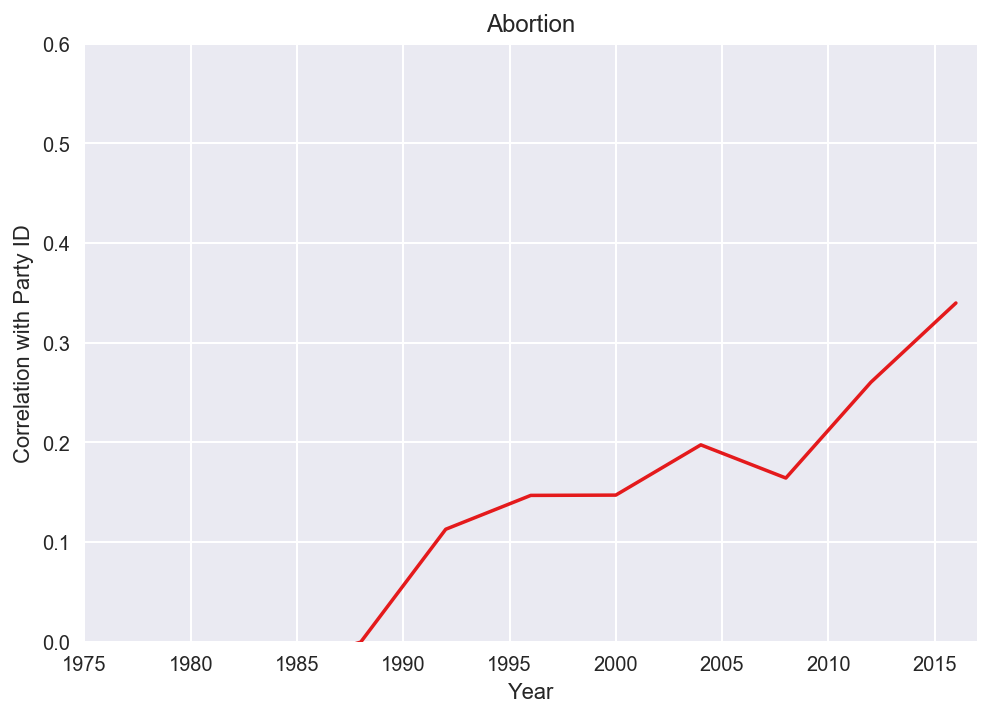

In [17]:
plot_correlation_with_party_over_time("Abortion")

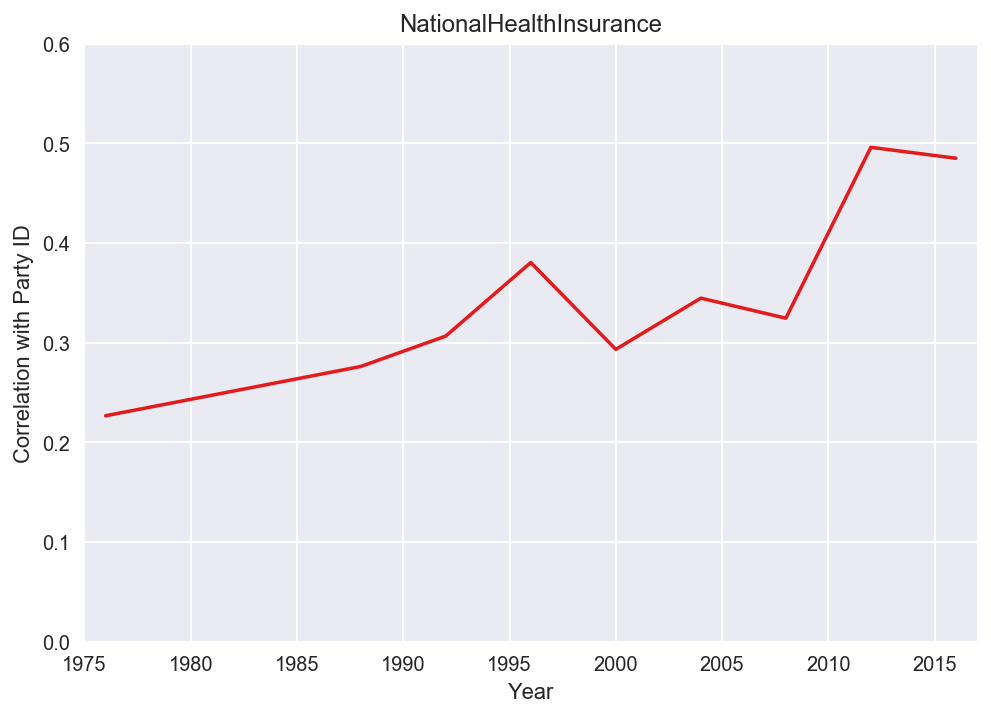

In [18]:
plot_correlation_with_party_over_time("NationalHealthInsurance")

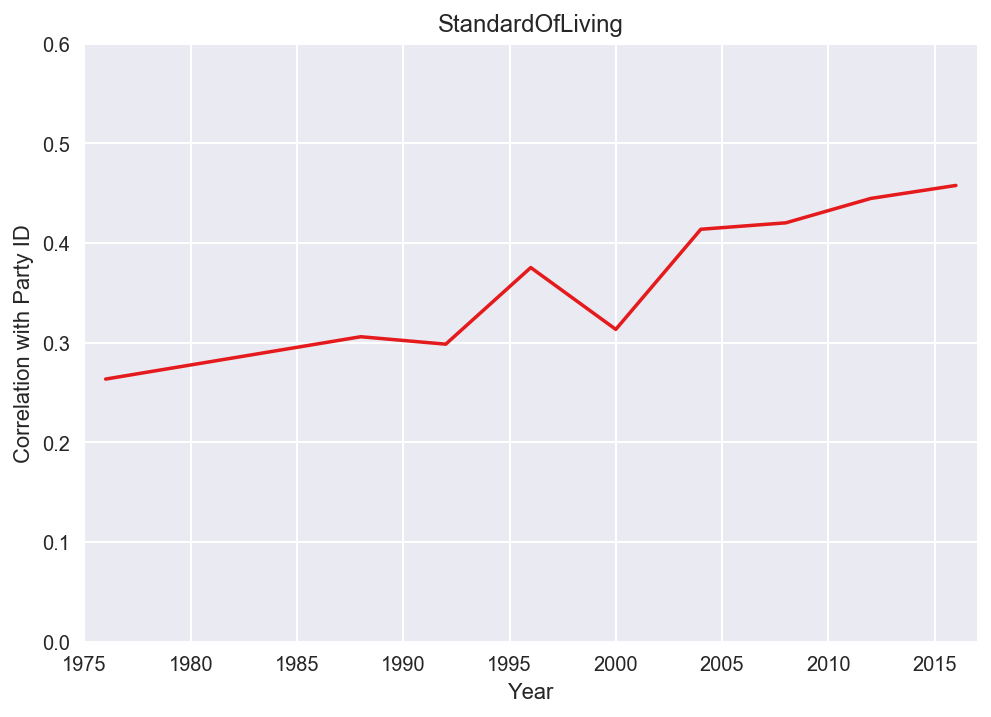

In [19]:
plot_correlation_with_party_over_time("StandardOfLiving")

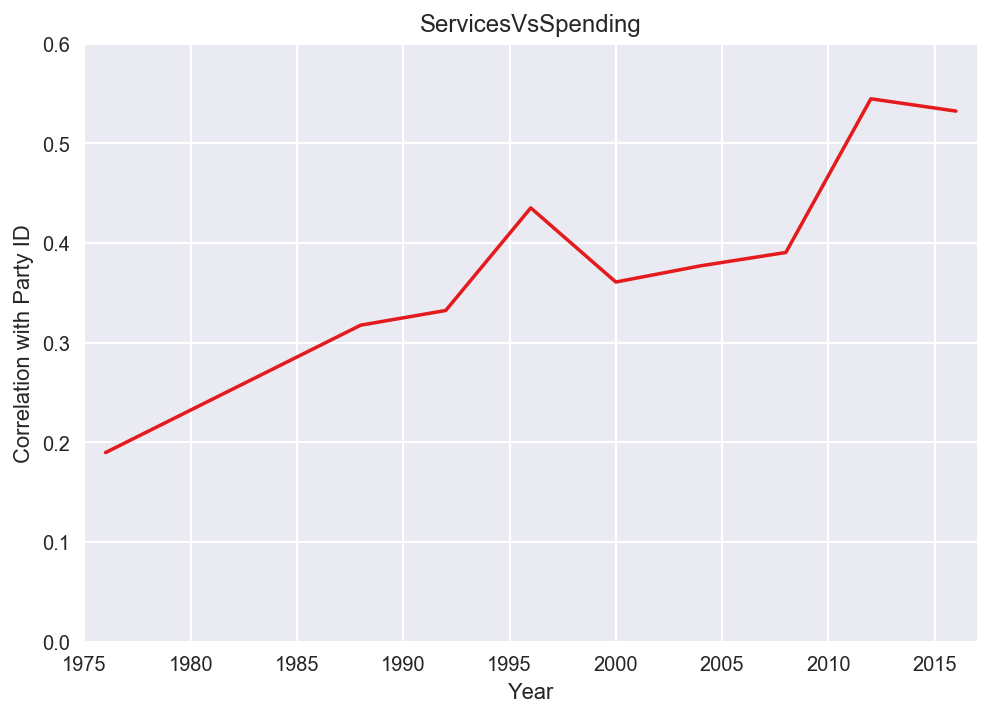

In [20]:
plot_correlation_with_party_over_time("ServicesVsSpending")

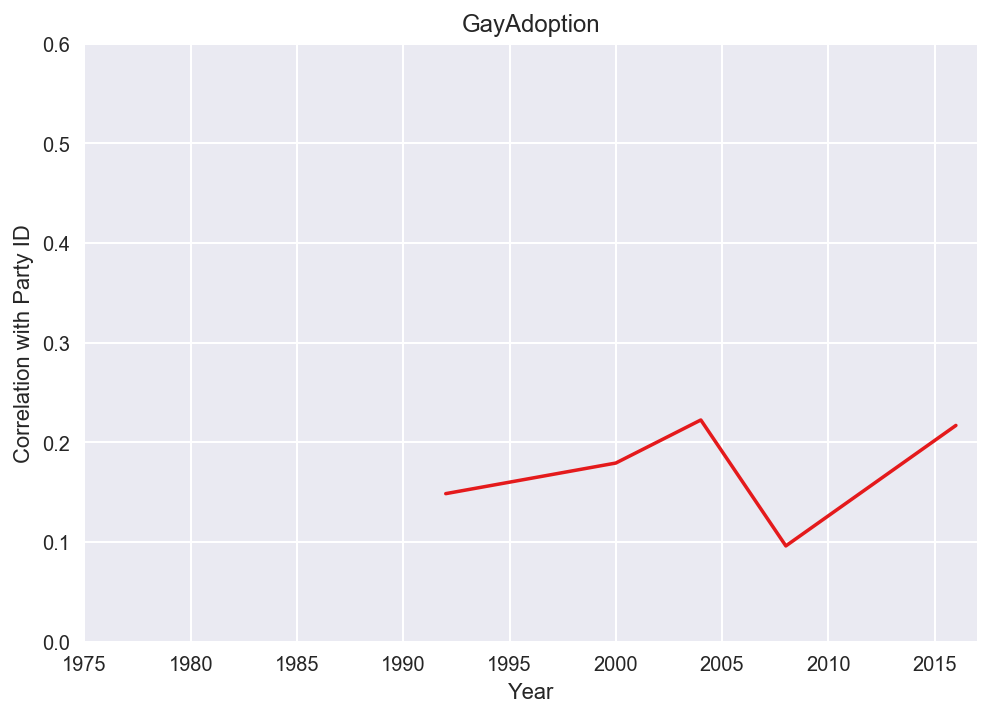

In [21]:
plot_correlation_with_party_over_time("GayAdoption")

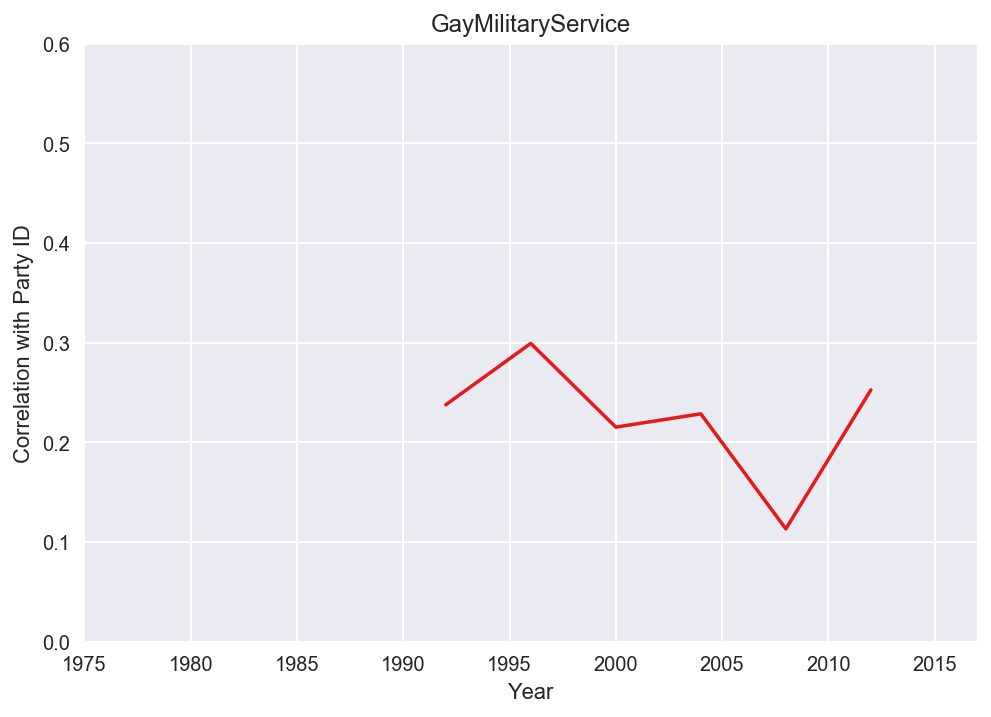

In [22]:
plot_correlation_with_party_over_time("GayMilitaryService")

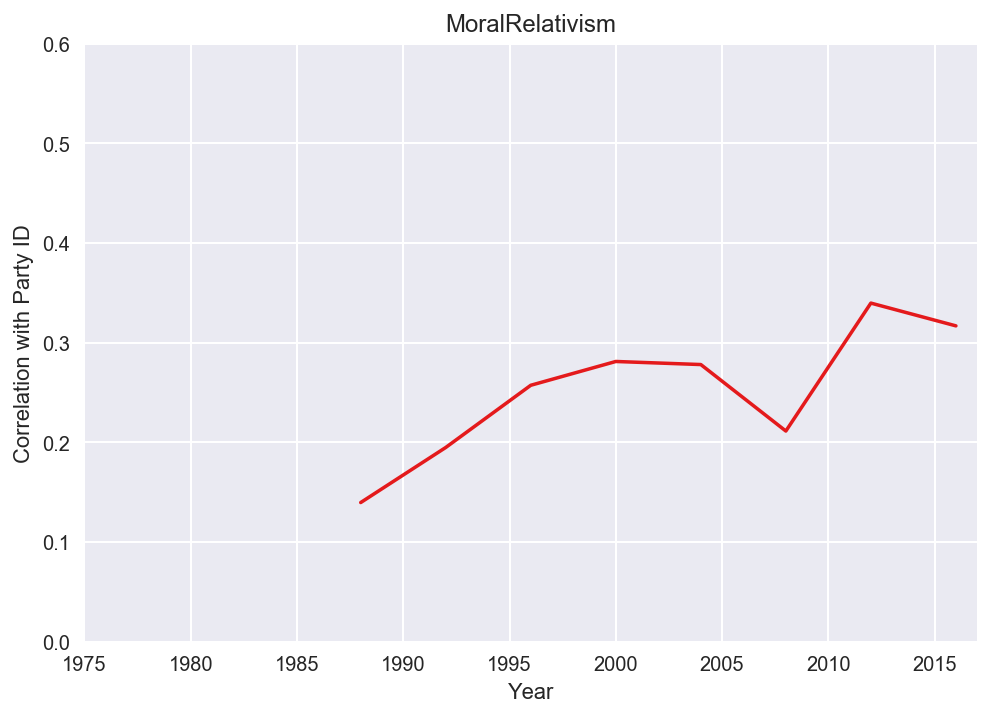

In [23]:
plot_correlation_with_party_over_time("MoralRelativism")

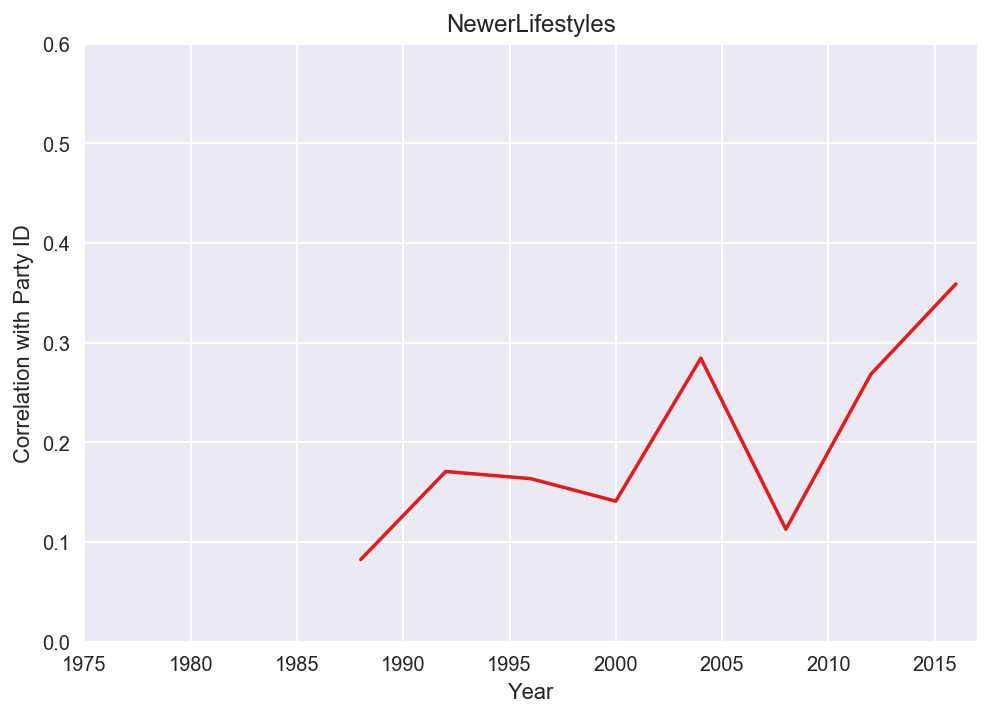

In [24]:
plot_correlation_with_party_over_time("NewerLifestyles")

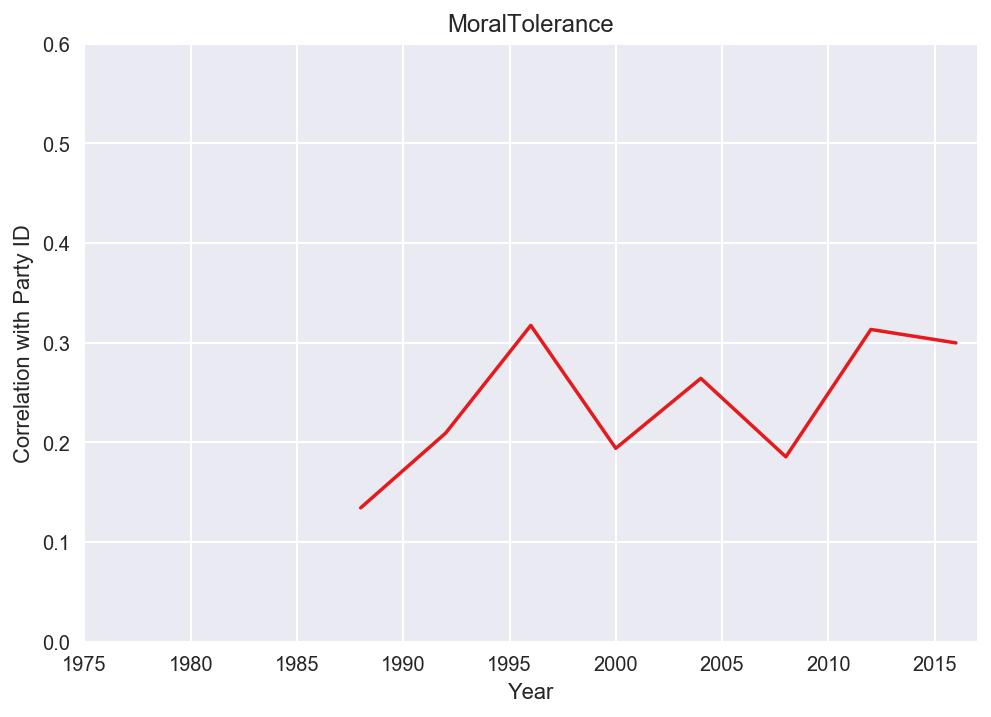

In [25]:
plot_correlation_with_party_over_time("MoralTolerance")

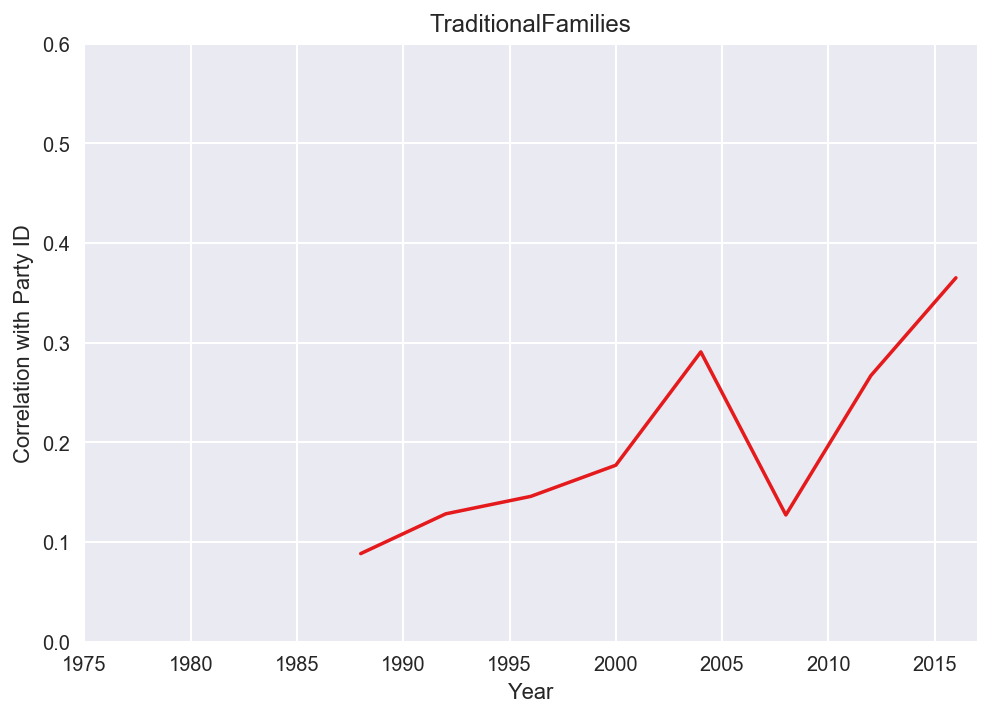

In [26]:
plot_correlation_with_party_over_time("TraditionalFamilies")

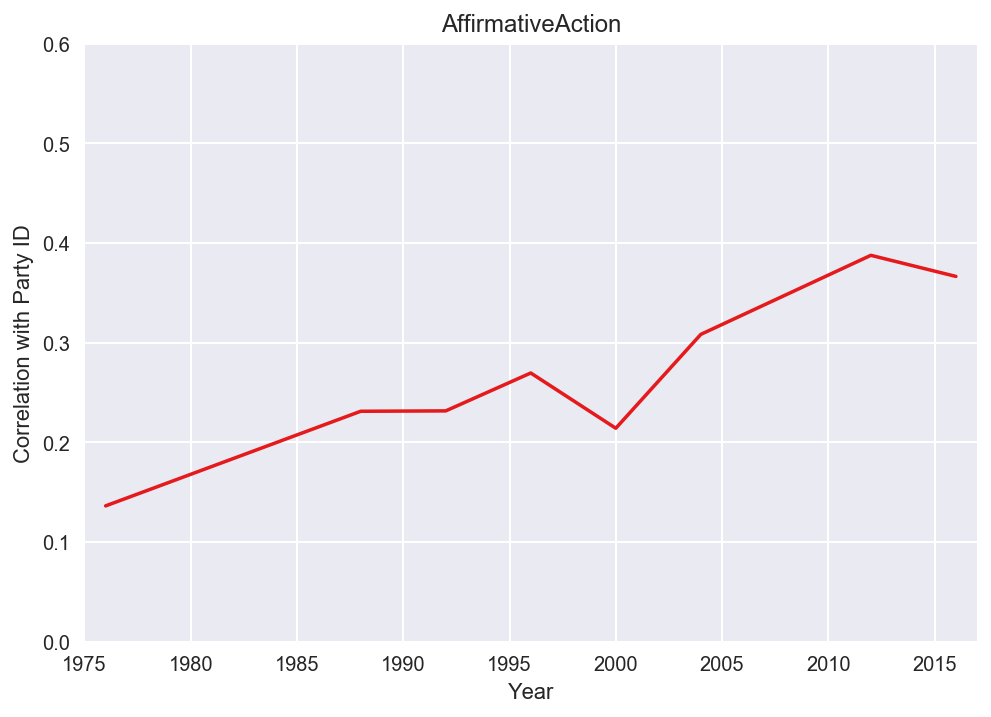

In [27]:
plot_correlation_with_party_over_time("AffirmativeAction")

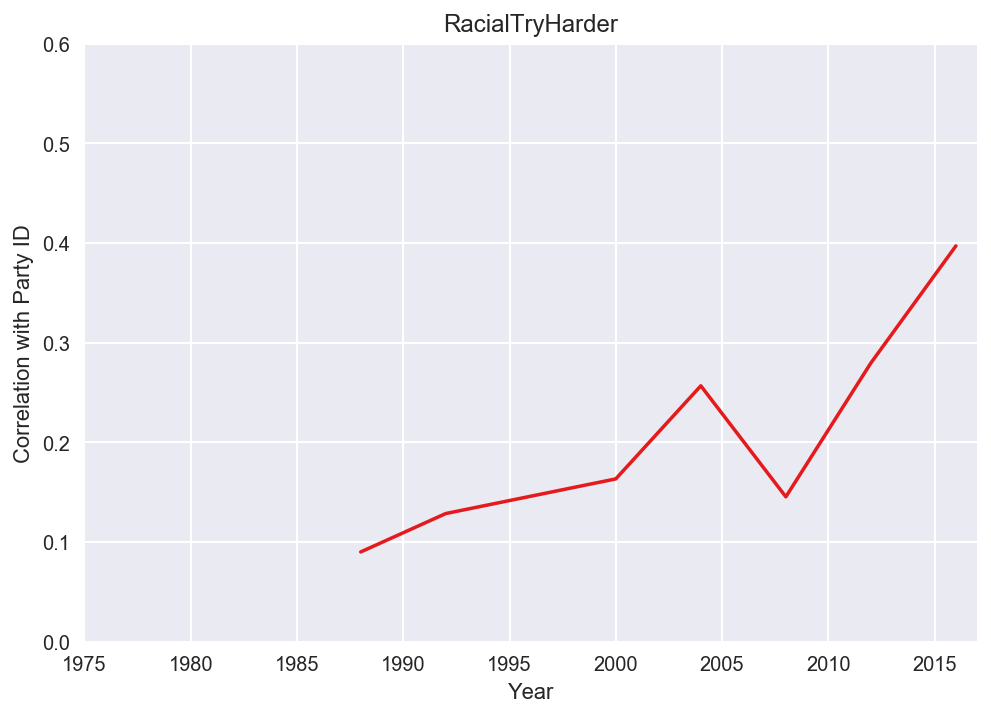

In [28]:
plot_correlation_with_party_over_time("RacialTryHarder")

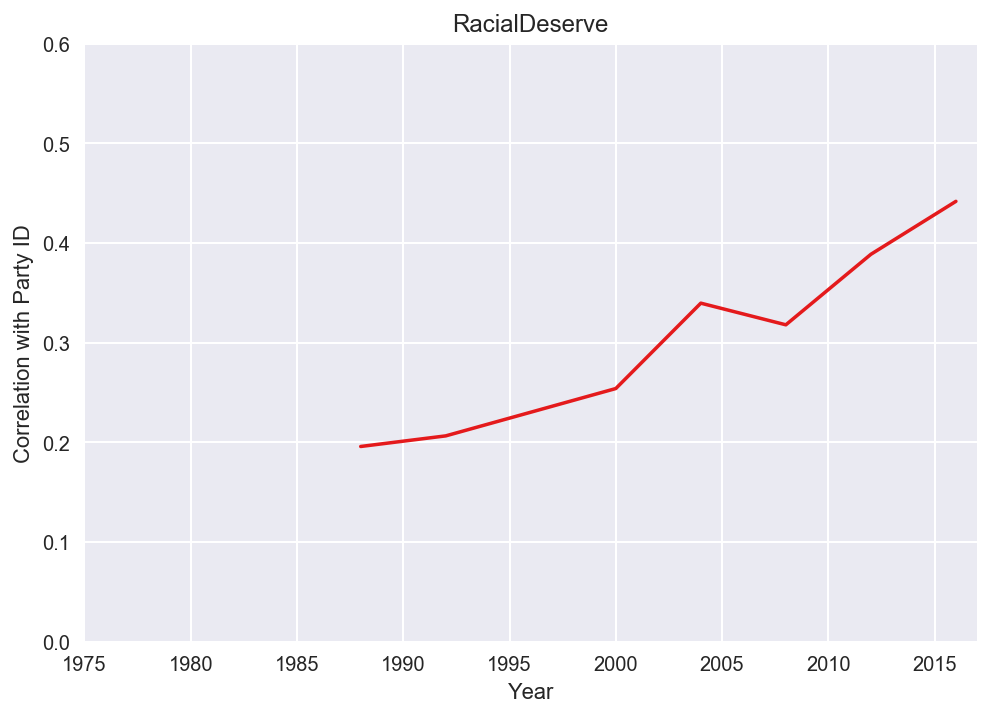

In [29]:
plot_correlation_with_party_over_time("RacialDeserve")

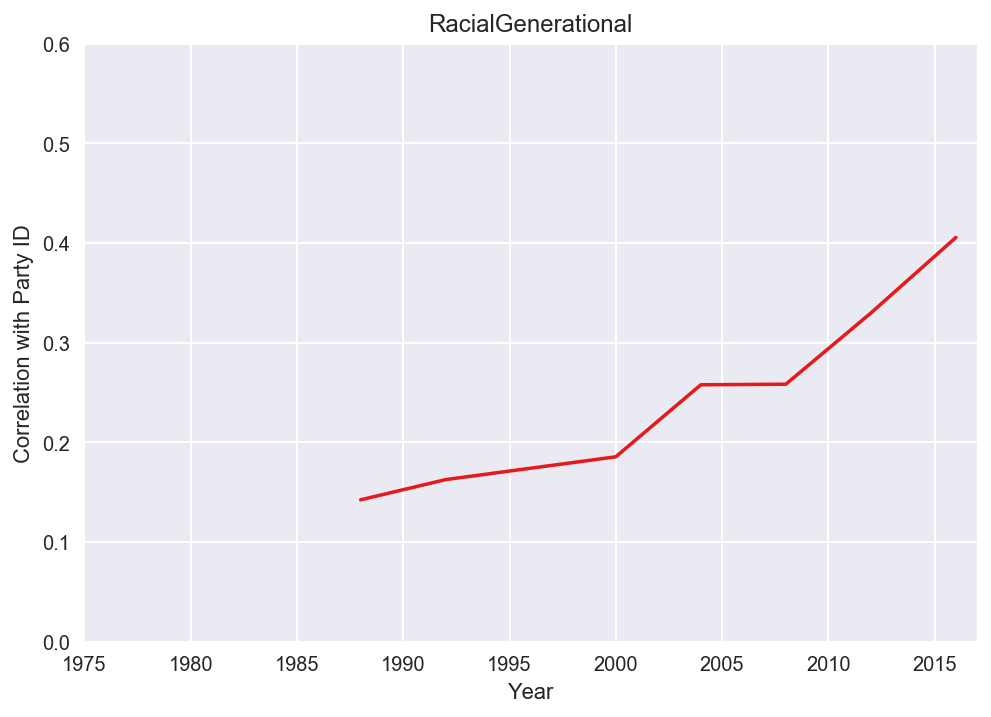

In [30]:
plot_correlation_with_party_over_time("RacialGenerational")

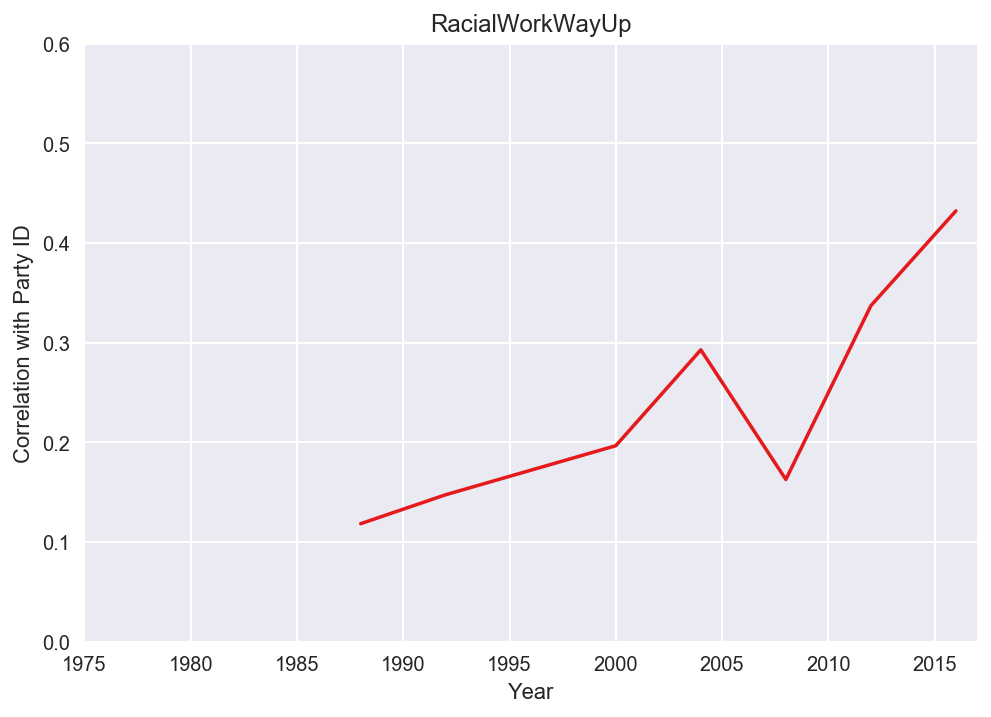

In [31]:
plot_correlation_with_party_over_time("RacialWorkWayUp")